<a href="https://colab.research.google.com/github/ovita-angera/Ovita-Google-Colab/blob/main/Recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data analytics using python under the following items
- Data preparation
- Data modelling
- Audit of models
- Report generation
- Presentation

In [ ]:
# prepare a simple image classification model
import matplotlib.pyplot as plt

# import data, and required tools for the model
from sklearn import datasets, metrics, svm # support vector machine model for image classification
from sklearn.model_selection import train_test_split # split data into train and test

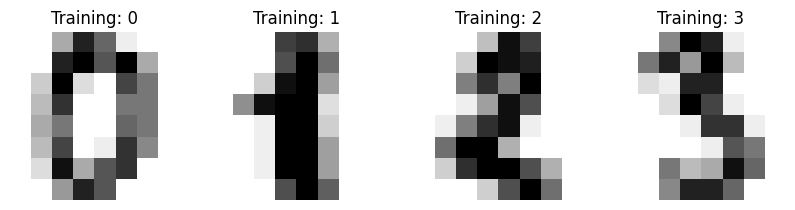

In [ ]:
# require the digits dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

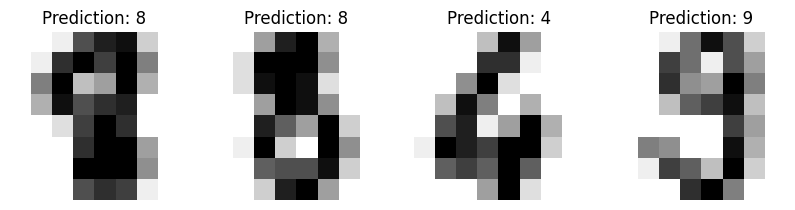

In [ ]:
# apply a classifier to the digits dataset
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classifier = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

# visualise the model
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### One hot encoding
- Best for categorical data with labels thast have no specific order of preference.
- For instance, if we have Gender (Male, Female), the label encoding - say Male - 0 and Female - 1 will have some sort of bias as it will give higher preference to the Female as 1 > 0.
- One hot encoding sort of deals with this.

**Advantages**
- Allows use of categorical variables in data that requires numeric input
- It might improve the model by providing more information about the variable.
- Helps avoid problem of ordinality  (order to the categories) which can occur when a categorical variable has a natural ordering.

**Disadvantages**
- Increased dimentionality, make the model more complex and slow to train
- Can lead to sparse data as most observations will have a value of 0 in most of the one-hot encoded columns.
- Can lead to overfitting, esp if there are many categories in the variable and the sample size is relatively small.


In [1]:
# An example
import pandas as pd

**Rearrange the columns**
Ideally, the way to do this for a pandas dataframe (df), is to use one the following:
- `df.reindex(columns = ['the', 'order','you','want'])`
- `df.reindex(['the', 'order','you','want'], axis = 1)`

In [20]:
df = pd.DataFrame({'Gender':['Male', 'Female', 'Female', 'Male', 'Female','Male','Female', 'Female', 'Male', 'Female'],
                   'Remarks': ['Nice', 'Good', 'Great', 'Great', 'Good', 'Nice', 'Great', 'Good', 'Nice', 'Great'],
                   'Employee_ID': [12,23,34,46,57,66,57,38,89,17]}).reindex(['Employee_ID', 'Gender', 'Remarks'], axis=1)
df

,Employee_ID,Gender,Remarks
0,12,Male,Nice
1,23,Female,Good
2,34,Female,Great
3,46,Male,Great
4,57,Female,Good
5,66,Male,Nice
6,57,Female,Great
7,38,Female,Good
8,89,Male,Nice
9,17,Female,Great


In [21]:
## use unique() pandas function to get the unique sets in each of the categorical columns
print(df['Gender'].unique())
print(df['Remarks'].unique())

['Male' 'Female']
['Nice' 'Good' 'Great']


In [22]:
## count elements in the columns (sort of cross tabulation)
print(df['Gender'].value_counts())
print(df['Remarks'].value_counts())

Gender
Female    6
Male      4
Name: count, dtype: int64
Remarks
Great    4
Nice     3
Good     3
Name: count, dtype: int64


**Cross tabulation using pandas**
* `pandas.crosstab()` functions very similar to `.pivot_table()`.
* The two main differences are that:
  - By default, if you don't pass the values of parameters values and aggfunc, the `crosstab()` builds a frequency (aka a contingency) table.
  - `crosstab()` is more suitable for creating a table from various indexed iterables, while `.pivot_table()` is for creating a table from the existing dataframes.
  

  - It takes in two arguments
    - index: corresponds to values to group by in the rows
    - columns: values to group by in the columns for the feature frequency table

In [8]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Let's find how many times in what year with how many cylinders the engines were used.

In [10]:
crossTable = pd.crosstab(index = df.cylinders, columns = df['model year'])
crossTable

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0
4,7,13,14,11,15,12,15,14,17,12,25,21,28
5,0,0,0,0,0,0,0,0,1,1,1,0,0
6,4,8,0,8,7,12,10,5,12,6,2,7,3
8,18,7,13,20,5,6,9,8,6,10,0,1,0


We can access individual elements using either `.iloc()` or `.loc()`

In [11]:
# 4th row, 1st column
value_iloc = crossTable.iloc[3,0]

In [12]:
# Access using value, 6 corresponds to cylinders and 70 corresponds to model year
value_loc = crossTable.loc[6,70]

In [13]:
print(f'cylinders = 6; model_year = 70 with iloc: {value_iloc}')
print(f'cylinders = 6; model_year = 70 with loc: {value_loc}')

cylinders = 6; model_year = 70 with iloc: 4
cylinders = 6; model_year = 70 with loc: 4


A couple of things can be done with the generated contingency table. For instance, finding the row and column totals, developin relative values in the cases where absolute values are not really required and even getting proportions rowise or columnwise.

In [14]:
### row and column totals
pd.crosstab(index = df.cylinders, columns = df['model year'], margins = True)

model year,70,71,72,73,74,75,76,77,78,79,80,81,82,All
cylinders,,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0,4
4,7,13,14,11,15,12,15,14,17,12,25,21,28,204
5,0,0,0,0,0,0,0,0,1,1,1,0,0,3
6,4,8,0,8,7,12,10,5,12,6,2,7,3,84
8,18,7,13,20,5,6,9,8,6,10,0,1,0,103
All,29,28,28,40,27,30,34,28,36,29,29,29,31,398


In [17]:
### getting relative frequency
pd.crosstab(index = df.cylinders, columns = df['model year'], normalize = True, margins=True).round(2)

model year,70,71,72,73,74,75,76,77,78,79,80,81,82,All
cylinders,,,,,,,,,,,,,,
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
4,0.02,0.03,0.04,0.03,0.04,0.03,0.04,0.04,0.04,0.03,0.06,0.05,0.07,0.51
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
6,0.01,0.02,0.00,0.02,0.02,0.03,0.03,0.01,0.03,0.02,0.01,0.02,0.01,0.21
8,0.05,0.02,0.03,0.05,0.01,0.02,0.02,0.02,0.02,0.03,0.00,0.00,0.00,0.26
All,0.07,0.07,0.07,0.10,0.07,0.08,0.09,0.07,0.09,0.07,0.07,0.07,0.08,1.00


Explore the cylinder number by production years

In [18]:
### index on rows
pd.crosstab(index = df.cylinders, columns = df['model year'], normalize = 'index', margins=True).round(2)

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.00,0.00
4,0.03,0.06,0.07,0.05,0.07,0.06,0.07,0.07,0.08,0.06,0.12,0.10,0.14
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.33,0.33,0.00,0.00
6,0.05,0.10,0.00,0.10,0.08,0.14,0.12,0.06,0.14,0.07,0.02,0.08,0.04
8,0.17,0.07,0.13,0.19,0.05,0.06,0.09,0.08,0.06,0.10,0.00,0.01,0.00
All,0.07,0.07,0.07,0.10,0.07,0.08,0.09,0.07,0.09,0.07,0.07,0.07,0.08


To achieve same functionality using pivot_table

In [19]:
df.pivot_table(index = 'cylinders', columns = 'model year',values = 'car name', aggfunc = 'count').fillna(0).astype(int)

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0
4,7,13,14,11,15,12,15,14,17,12,25,21,28
5,0,0,0,0,0,0,0,0,1,1,1,0,0
6,4,8,0,8,7,12,10,5,12,6,2,7,3
8,18,7,13,20,5,6,9,8,6,10,0,1,0


... Back to the bando

In [26]:
### use of the pandas library to do one hot encoding
### the use of dtype to get the feedback as ones and zeros instead of booleans True False
### pd.get_dummies is used to perform the one hot encoding in this case and it returns a dataframe with extra columns in place of the encoded columns
one_hot_encoded_data = pd.get_dummies(df, columns = ['Remarks','Gender'], dtype='int')
print(one_hot_encoded_data)

   Employee_ID  Remarks_Good  Remarks_Great  Remarks_Nice  Gender_Female  \
0           12             0              0             1              0   
1           23             1              0             0              1   
2           34             0              1             0              1   
3           46             0              1             0              0   
4           57             1              0             0              1   
5           66             0              0             1              0   
6           57             0              1             0              1   
7           38             1              0             0              1   
8           89             0              0             1              0   
9           17             0              1             0              1   

   Gender_Male  
0            1  
1            0  
2            0  
3            1  
4            0  
5            1  
6            0  
7            0  
8         

In [27]:
### One hot encoding using sklearn
### import the required libraries for the encoding practice

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [28]:
### define the data to be used in illustrating this concept
#Building a dummy employee dataset for example
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }

In [29]:
### convert the set into a data frame

data = pd.DataFrame(data)
data

,Employee id,Gender,Remarks
0,10,M,Good
1,20,F,Nice
2,15,F,Good
3,25,M,Great
4,30,F,Nice


In [30]:
### Extract the categorical columns from the dataframe
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [36]:
### initialize and apply the one hot encoder to the categorical columns

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[categorical_columns])

In [37]:
df.select_dtypes(include=['object']).columns.tolist() ### acts as a filter for the daataset for columns with categorical data (strings)

['Gender', 'Remarks']

In [46]:
### We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [47]:
### concatenate the one hot df with the original df
preprocessed = pd.concat([data, one_hot_df], axis = 1).drop(categorical_columns, axis = 1)

In [48]:
preprocessed

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,0.0,1.0,1.0,0.0,0.0
1,20,1.0,0.0,0.0,0.0,1.0
2,15,1.0,0.0,1.0,0.0,0.0
3,25,0.0,1.0,0.0,1.0,0.0
4,30,1.0,0.0,0.0,0.0,1.0
